In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# df=pd.read_csv("/kaggle/input/titanic/train.csv")
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print(df.shape)
print(df.info())
df.nunique()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.describe()  # works only for numerical columns


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
# countplot,pieplot,barplot
cat=df.select_dtypes(include='object').columns
print('Categorical:',list(cat))

print()
# histplot,boxplot,density
num=df.select_dtypes(include=np.number).columns
print('numerical:',list(num))

Categorical: ['Sex', 'Cabin', 'Embarked']

numerical: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Survived


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


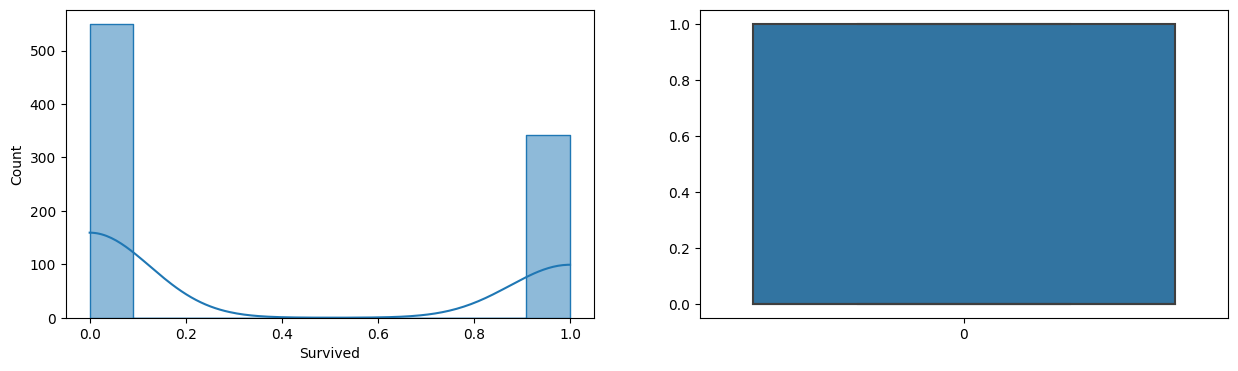

Pclass


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


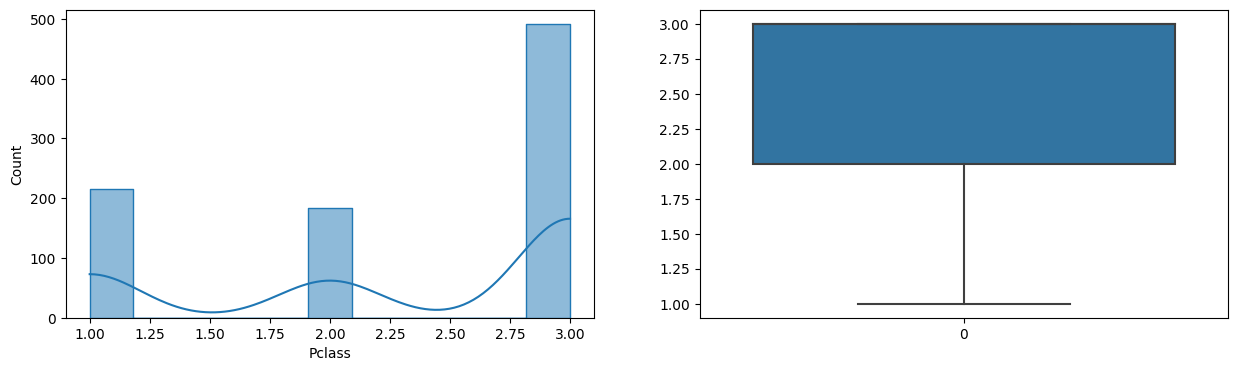

Age


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


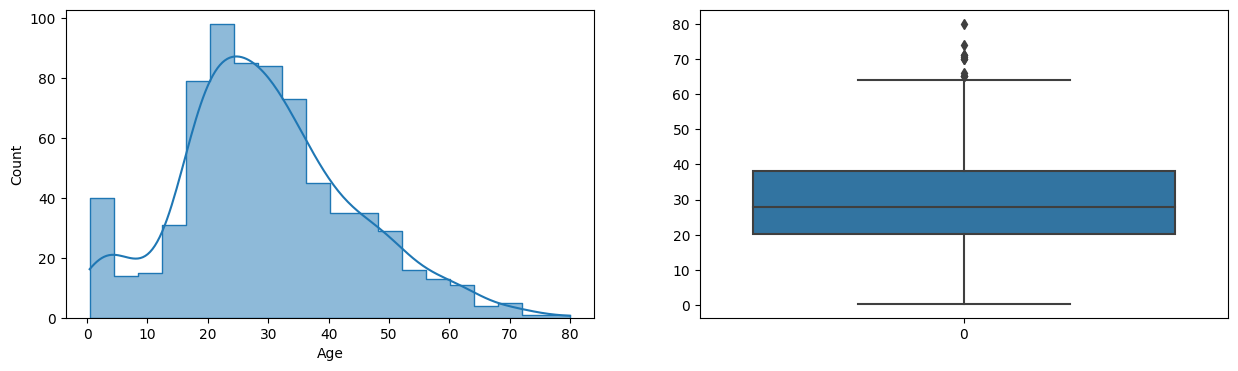

SibSp


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


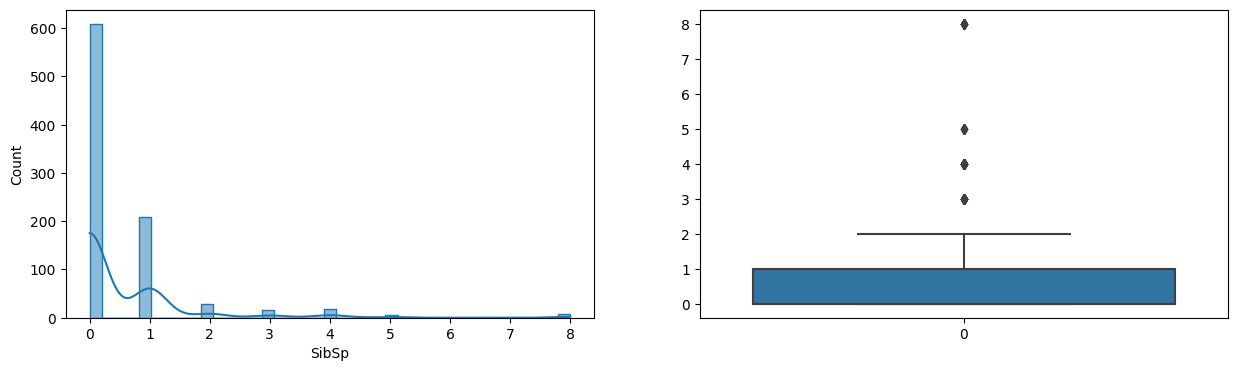

Parch


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


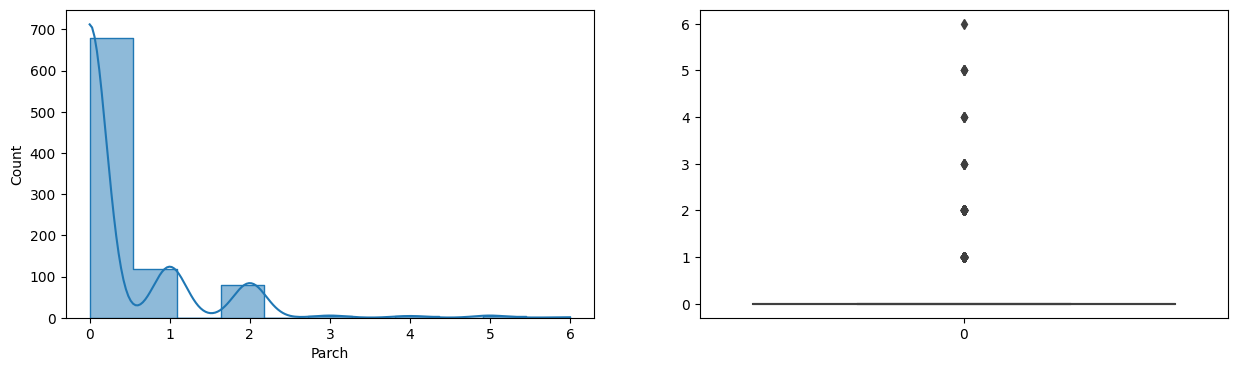

Fare


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


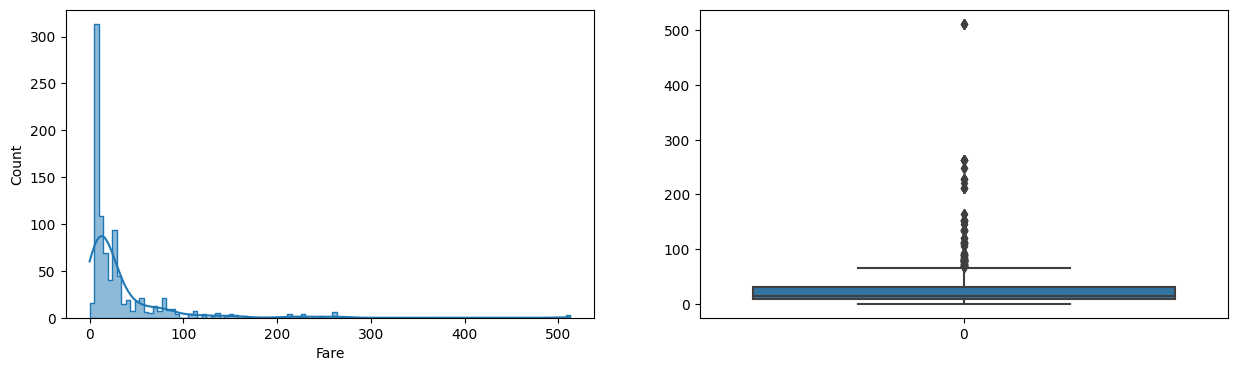

In [13]:
for i in num:
    print(i)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(df[i],element='step',kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.show()

Sex


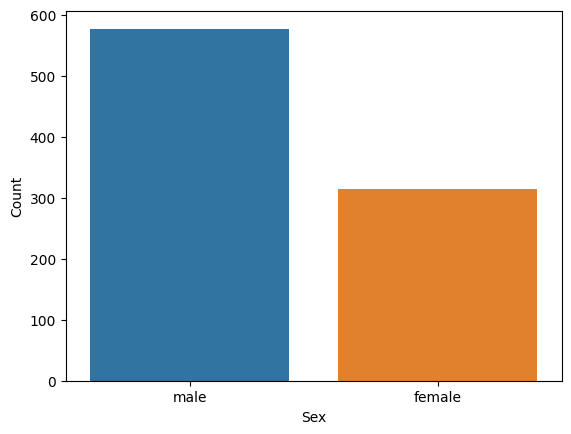

Cabin


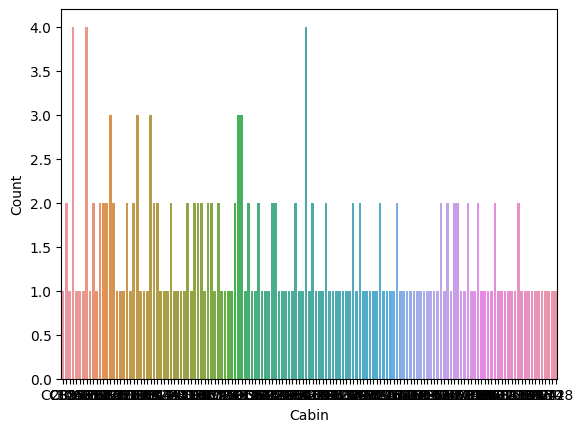

Embarked


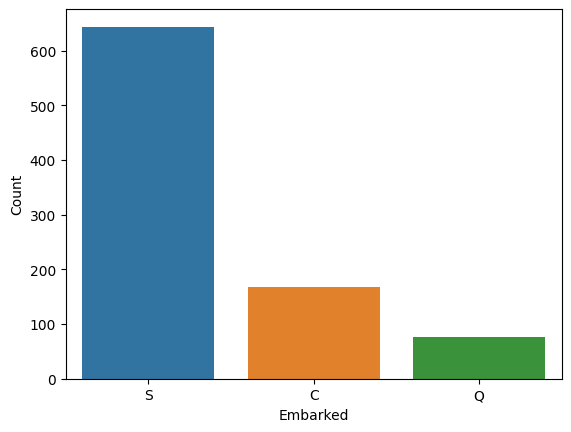

In [14]:

# For categorical columns
for col in cat:
    print(col)
    sns.countplot(x=df[col],data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Axes(0.125,0.11;0.775x0.77)


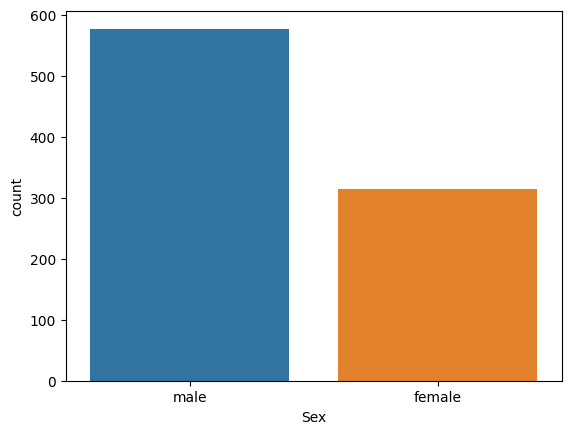

<Axes: xlabel='Embarked', ylabel='count'>

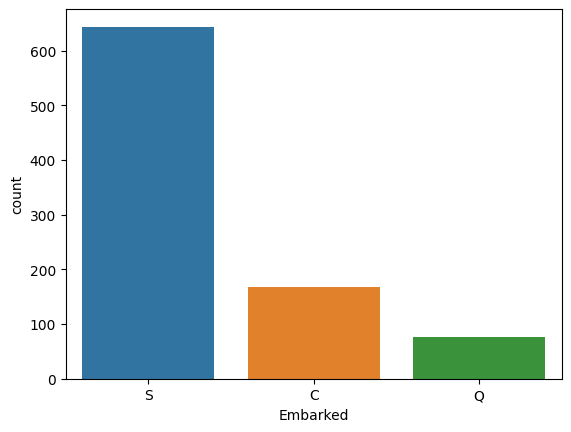

In [15]:
print(sns.countplot(data=df,x='Sex'))
plt.show()
sns.countplot(data=df,x='Embarked')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

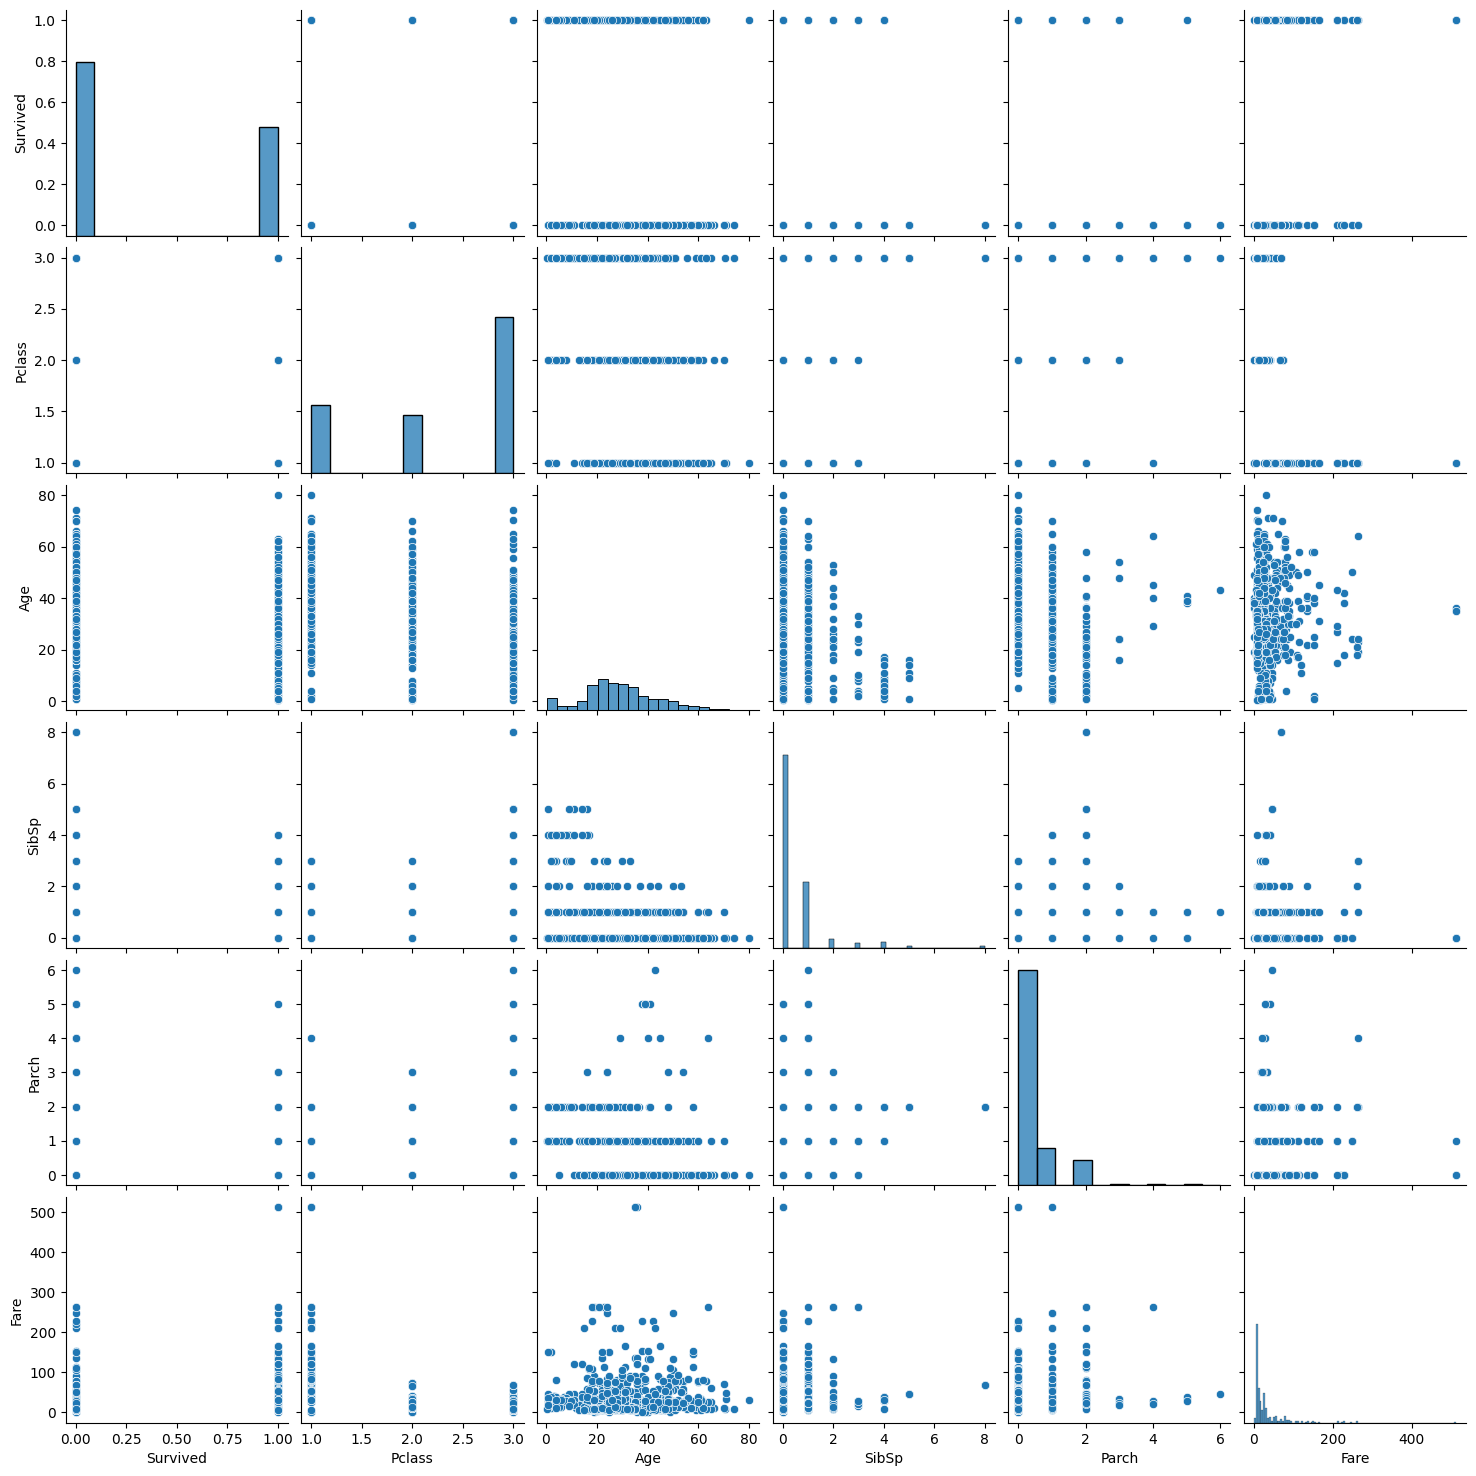

In [16]:
sns.pairplot(df)
plt.show()

<Axes: >

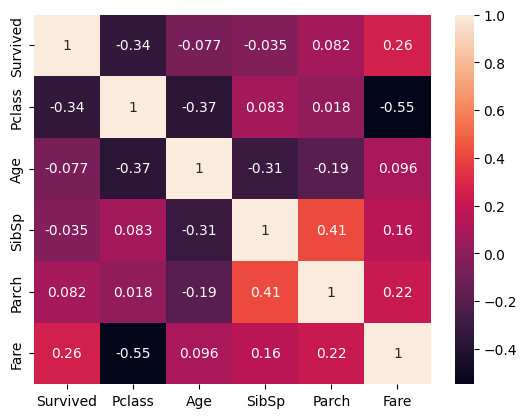

In [17]:
df2 = df.select_dtypes(exclude=['object'])
sns.heatmap(df2.corr(),annot=True)

# Handle missing values

## Rowwise

In [18]:
df1=df.copy()

In [19]:
df1.dropna(axis=0)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S


# column

In [20]:
df2=df.copy()

In [21]:
df2.drop(['Age','Cabin','Embarked'],axis=1,inplace=True)

In [22]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')

# imputation

C:\Users\ronak\AppData\Local\Temp\ipykernel_26188\2470217168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

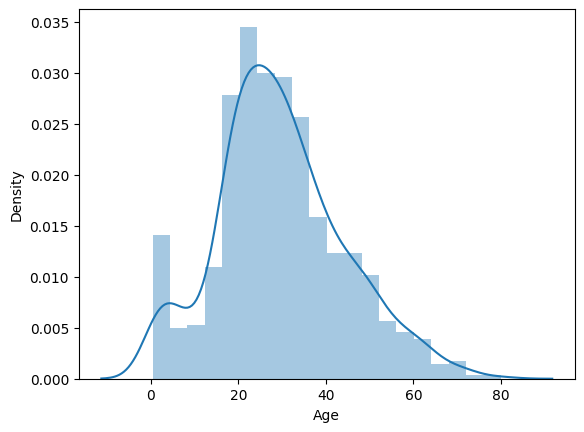

In [23]:
sns.distplot(df.Age)
# df2.fillna(mean)

In [24]:
def impute_nan_mean(df,column,mean):
    df[column+'mean']=df[column].fillna(mean)
    return df
    


In [25]:
mean_val=df.Age.mean()
mean_val

29.69911764705882

In [26]:
x=impute_nan_mean(df,'Age',mean_val)


In [27]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Agemean
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000


In [28]:
def impute_nan_median(df,column,median):
    df[column+'median']=df[column].fillna(median)
    return df

In [29]:
median_val=df.Age.median()
median_val

28.0

In [30]:
y=impute_nan_median(df,'Age',median_val)

In [31]:
y

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Agemean,Agemedian
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000,26.0


In [32]:
def impute_nan_mod(df,column,mod):
    df[column+'mod']=df[column].fillna(mod)
    return df

In [33]:
mod_val=df.Age.mode()
mod_val

0    24.0
Name: Age, dtype: float64

In [34]:
z=impute_nan_mod(df,'Age',mod_val)

In [35]:
z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Agemean,Agemedian,Agemod
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000,27.0,27.0
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000,19.0,19.0
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118,28.0,NaN
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000,26.0,26.0


In [36]:
print(df['Cabin'].value_counts())

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


In [37]:
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [38]:
df['Embarked_mode']=df['Embarked'].fillna(df.Embarked.mode()[0]) # here we put [0] to get the first mode value

In [39]:
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Cabin            687
Embarked           2
Agemean            0
Agemedian          0
Agemod           177
Embarked_mode      0
dtype: int64

In [40]:
# condition: In this case, the condition is df['Cabin'].isnull(), so it's checking whether each value in the 'Cabin' column is null.

# x: If the condition is True, i.e., if the value in the 'Cabin' column is null, then it assigns 0 to the corresponding position in the new 'cabin_nan' column.

# y: If the condition is False, i.e., if the value in the 'Cabin' column is not null, then it assigns 1 to the corresponding position in the new 'cabin_nan' column

In [41]:
df['cabin_nan']=np.where(df['Cabin'].isnull(),0,1) #(C,0,1)

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Agemean,Agemedian,Agemod,Embarked_mode,cabin_nan
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000,22.0,22.0,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000,38.0,38.0,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000,26.0,26.0,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000,35.0,35.0,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000,35.0,35.0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000,27.0,27.0,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000,19.0,19.0,S,1
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118,28.0,NaN,S,0
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000,26.0,26.0,C,1


In [43]:
df.drop(["Cabin",'Embarked', 'Age', 'Agemedian', 'Agemod'],axis=1,inplace=True
       
       )

In [44]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Agemean',
       'Embarked_mode', 'cabin_nan'],
      dtype='object')

In [45]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Agemean,Embarked_mode,cabin_nan
0,0,3,male,1,0,7.2500,22.000000,S,0
1,1,1,female,1,0,71.2833,38.000000,C,1
2,1,3,female,0,0,7.9250,26.000000,S,0
3,1,1,female,1,0,53.1000,35.000000,S,1
4,0,3,male,0,0,8.0500,35.000000,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,0
887,1,1,female,0,0,30.0000,19.000000,S,1
888,0,3,female,1,2,23.4500,29.699118,S,0
889,1,1,male,0,0,30.0000,26.000000,C,1


In [46]:
df.rename(columns={'Agemean':'Age',	'Embarked_mode':'Embarked','cabin_nan':'Cabin'},inplace=True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,0
1,1,1,female,1,0,71.2833,38.000000,C,1
2,1,3,female,0,0,7.9250,26.000000,S,0
3,1,1,female,1,0,53.1000,35.000000,S,1
4,0,3,male,0,0,8.0500,35.000000,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,0
887,1,1,female,0,0,30.0000,19.000000,S,1
888,0,3,female,1,2,23.4500,29.699118,S,0
889,1,1,male,0,0,30.0000,26.000000,C,1


# Handle Missing values completed//

outliers
data encoding, data scaling
problem statement
solution
work flow(Graph)
tech stack
conclusion
business model
usp

In [47]:
num=df.select_dtypes(include=np.number).columns
num

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Cabin'], dtype='object')

# Removing Outliers

Survived


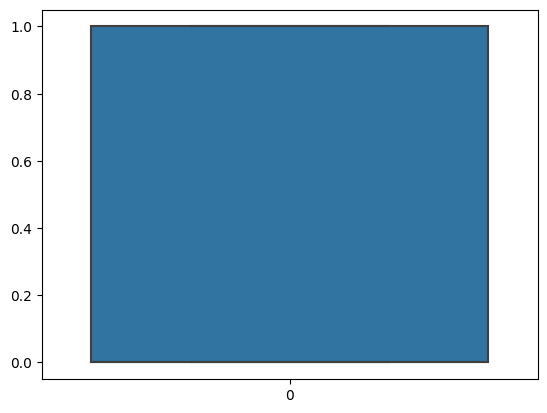

Pclass


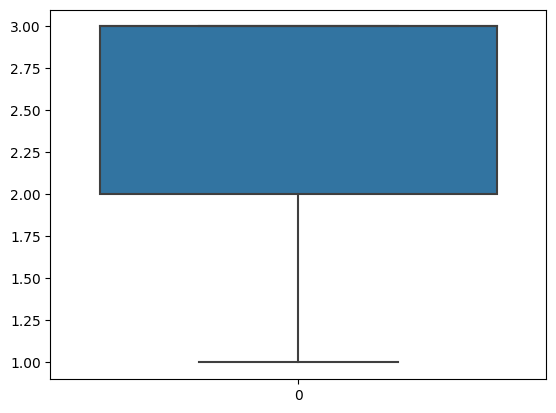

SibSp


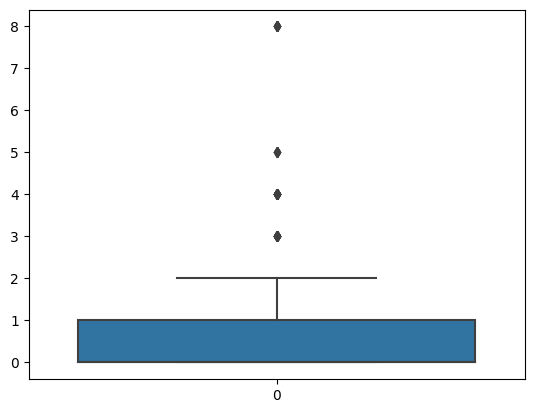

Parch


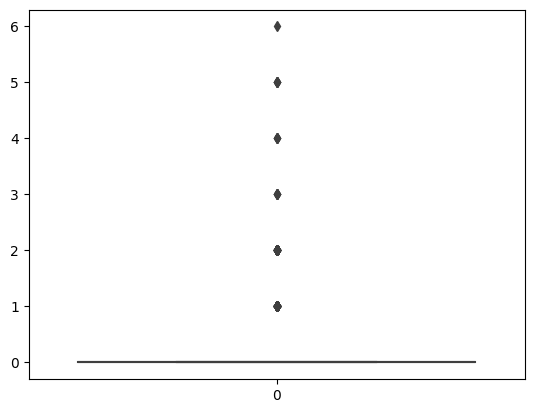

Fare


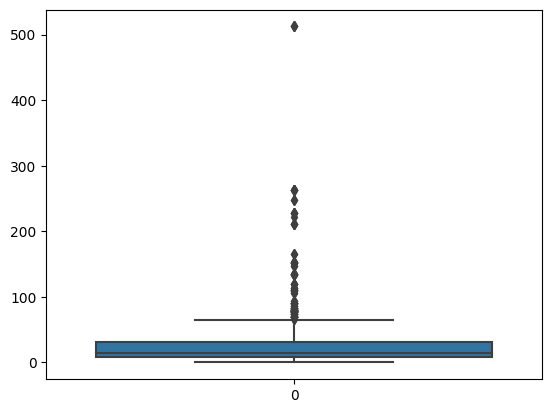

Age


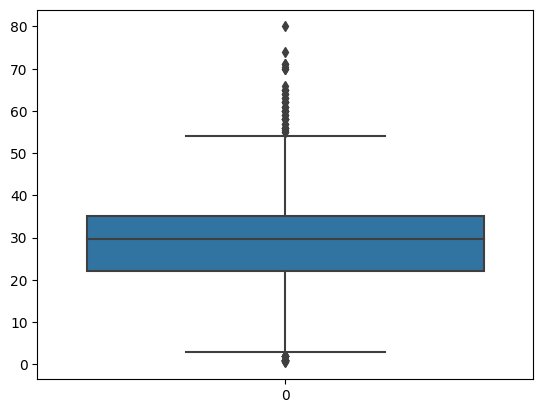

Cabin


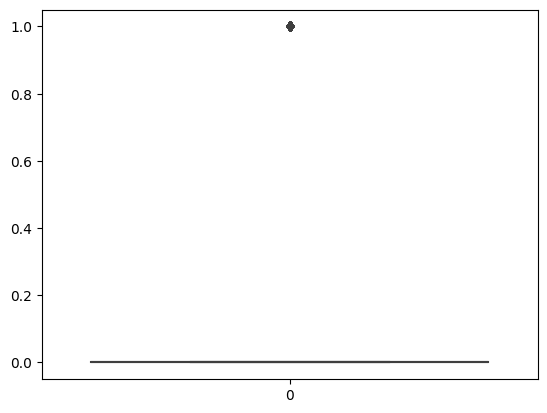

In [48]:
# numerical data boxplot
for i in num:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [49]:
def remover(df,column,threshold):
    # print the real data plot
    plt.subplot(1,2,1)
    sns.boxplot(df[column])
    plt.show()
    # after removing outliers
    # creating new column
    rem_out=df[df[column]<=threshold]
    plt.subplot(1,2,2)
    sns.boxplot(rem_out[column])
    plt.show()
    return rem_out

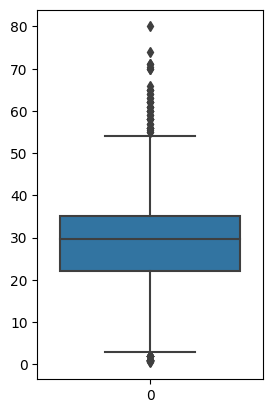

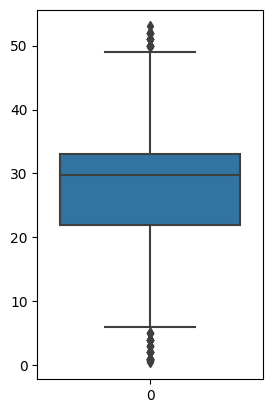

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,0
1,1,1,female,1,0,71.2833,38.000000,C,1
2,1,3,female,0,0,7.9250,26.000000,S,0
3,1,1,female,1,0,53.1000,35.000000,S,1
4,0,3,male,0,0,8.0500,35.000000,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,0
887,1,1,female,0,0,30.0000,19.000000,S,1
888,0,3,female,1,2,23.4500,29.699118,S,0
889,1,1,male,0,0,30.0000,26.000000,C,1


In [50]:

df1=remover(df, 'Age', 53)
df1

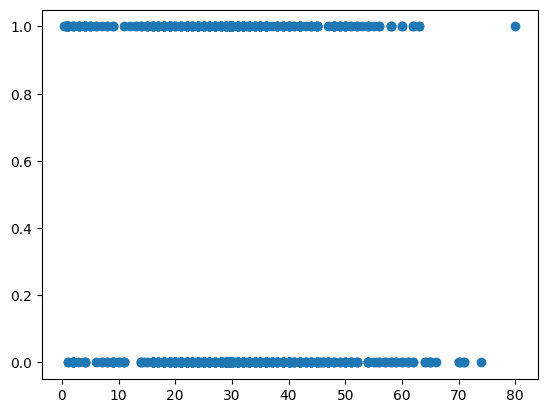

In [51]:

plt.scatter(df["Age"],df["Survived"])
plt.show()

In [52]:
from scipy import stats

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Age       891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Cabin     891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


### Note: It doesn't work in columns that has missing values

In [54]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [55]:
z = np.abs(stats.zscore(df['Age']))
print(z)

0      0.592481
1      0.638789
2      0.284663
3      0.407926
4      0.407926
         ...   
886    0.207709
887    0.823344
888    0.000000
889    0.284663
890    0.177063
Name: Age, Length: 891, dtype: float64


In [56]:

threshold_z = 2.5
 
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (891, 9)
DataFrame Shape after Removing Outliers: (876, 9)


In [57]:
df.head(15)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,0
1,1,1,female,1,0,71.2833,38.000000,C,1
2,1,3,female,0,0,7.9250,26.000000,S,0
3,1,1,female,1,0,53.1000,35.000000,S,1
4,0,3,male,0,0,8.0500,35.000000,S,0
5,0,3,male,0,0,8.4583,29.699118,Q,0
6,0,1,male,0,0,51.8625,54.000000,S,1
7,0,3,male,3,1,21.0750,2.000000,S,0
8,1,3,female,0,2,11.1333,27.000000,S,0
9,1,2,female,1,0,30.0708,14.000000,C,0


##  Inter Quartile Range

In [58]:
# Q1 = np.percentile(df2['Age'], 25, method='midpoint')
# print("Q1 is:",Q1)
# Q3 = np.percentile(df2['Age'], 75, method='midpoint')
# print("Q3 is:",Q3)
# IQR = Q3 - Q1
# print("IQR is:",IQR)

#

# *Data Encoding*
#

## Label Encoding

In [59]:
df1=df.copy()

In [60]:
from sklearn.preprocessing import LabelEncoder 

In [61]:
le = LabelEncoder()

### Since Sex is ordinal dataset that's why we perform label encoding 

In [62]:
# Apply label encoding to the 'Sex' column
df1['Sex_encoded'] = le.fit_transform(df1['Sex'])

# Print the first few rows to verify the encoding
print(df1[['Sex', 'Sex_encoded']].head())

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [63]:
df1

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,Sex_encoded
0,0,3,male,1,0,7.2500,22.000000,S,0,1
1,1,1,female,1,0,71.2833,38.000000,C,1,0
2,1,3,female,0,0,7.9250,26.000000,S,0,0
3,1,1,female,1,0,53.1000,35.000000,S,1,0
4,0,3,male,0,0,8.0500,35.000000,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,0,1
887,1,1,female,0,0,30.0000,19.000000,S,1,0
888,0,3,female,1,2,23.4500,29.699118,S,0,0
889,1,1,male,0,0,30.0000,26.000000,C,1,1


In [64]:

# Apply label encoding to the 'Sex' column
df1['Embarked_Encoded'] = le.fit_transform(df1['Embarked'])

# Print the first few rows to verify the encoding
print(df1[['Embarked', 'Embarked_Encoded']].head(7))

  Embarked  Embarked_Encoded
0        S                 2
1        C                 0
2        S                 2
3        S                 2
4        S                 2
5        Q                 1
6        S                 2


# 
# One Hot Encoding

In [65]:
df2=df.copy()

In [66]:
ohe=pd.get_dummies(df2['Embarked'])
ohe

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [67]:
df_Encoded=pd.concat([df2,ohe],axis=1)
df_Encoded

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,C,Q,S
0,0,3,male,1,0,7.2500,22.000000,S,0,False,False,True
1,1,1,female,1,0,71.2833,38.000000,C,1,True,False,False
2,1,3,female,0,0,7.9250,26.000000,S,0,False,False,True
3,1,1,female,1,0,53.1000,35.000000,S,1,False,False,True
4,0,3,male,0,0,8.0500,35.000000,S,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,0,False,False,True
887,1,1,female,0,0,30.0000,19.000000,S,1,False,False,True
888,0,3,female,1,2,23.4500,29.699118,S,0,False,False,True
889,1,1,male,0,0,30.0000,26.000000,C,1,True,False,False


In [68]:
df_Encoded

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,C,Q,S
0,0,3,male,1,0,7.2500,22.000000,S,0,False,False,True
1,1,1,female,1,0,71.2833,38.000000,C,1,True,False,False
2,1,3,female,0,0,7.9250,26.000000,S,0,False,False,True
3,1,1,female,1,0,53.1000,35.000000,S,1,False,False,True
4,0,3,male,0,0,8.0500,35.000000,S,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,0,False,False,True
887,1,1,female,0,0,30.0000,19.000000,S,1,False,False,True
888,0,3,female,1,2,23.4500,29.699118,S,0,False,False,True
889,1,1,male,0,0,30.0000,26.000000,C,1,True,False,False


In [69]:
boolean=["C","S","Q"]
df_Encoded[boolean]=df_Encoded[boolean].astype(int)
boolean=["C","S","Q"]
df_Encoded.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,C,Q,S
0,0,3,male,1,0,7.2500,22.0,S,0,0,0,1
1,1,1,female,1,0,71.2833,38.0,C,1,1,0,0
2,1,3,female,0,0,7.9250,26.0,S,0,0,0,1
3,1,1,female,1,0,53.1000,35.0,S,1,0,0,1
4,0,3,male,0,0,8.0500,35.0,S,0,0,0,1


In [70]:
#                     ||||||||?/|||SECOND METHOD--->One Hot Encoding||||||||||| 

In [71]:
df2.head( )

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.0,S,0
1,1,1,female,1,0,71.2833,38.0,C,1
2,1,3,female,0,0,7.9250,26.0,S,0
3,1,1,female,1,0,53.1000,35.0,S,1
4,0,3,male,0,0,8.0500,35.0,S,0


In [72]:
import category_encoders as ce

In [73]:
encoder=ce.OneHotEncoder(cols='Embarked',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df2)
data_encoded

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_S,Embarked_C,Embarked_Q,Cabin
0,0,3,male,1,0,7.2500,22.000000,1.0,0.0,0.0,0
1,1,1,female,1,0,71.2833,38.000000,0.0,1.0,0.0,1
2,1,3,female,0,0,7.9250,26.000000,1.0,0.0,0.0,0
3,1,1,female,1,0,53.1000,35.000000,1.0,0.0,0.0,1
4,0,3,male,0,0,8.0500,35.000000,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,1.0,0.0,0.0,0
887,1,1,female,0,0,30.0000,19.000000,1.0,0.0,0.0,1
888,0,3,female,1,2,23.4500,29.699118,1.0,0.0,0.0,0
889,1,1,male,0,0,30.0000,26.000000,0.0,1.0,0.0,1


#
# Dummy Encoding

In [74]:
data_encoded_dummy=pd.get_dummies(data=df2,drop_first=True)
data_encoded_dummy

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.000000,0,True,False,True
1,1,1,1,0,71.2833,38.000000,1,False,False,False
2,1,3,0,0,7.9250,26.000000,0,False,False,True
3,1,1,1,0,53.1000,35.000000,1,False,False,True
4,0,3,0,0,8.0500,35.000000,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,0,True,False,True
887,1,1,0,0,30.0000,19.000000,1,False,False,True
888,0,3,1,2,23.4500,29.699118,0,False,False,True
889,1,1,0,0,30.0000,26.000000,1,True,False,False


In [75]:

x=["Sex_male","Embarked_Q","Embarked_S"]
data_encoded_dummy[x]=data_encoded_dummy[x].astype(int)
data_encoded_dummy

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.000000,0,1,0,1
1,1,1,1,0,71.2833,38.000000,1,0,0,0
2,1,3,0,0,7.9250,26.000000,0,0,0,1
3,1,1,1,0,53.1000,35.000000,1,0,0,1
4,0,3,0,0,8.0500,35.000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,0,1,0,1
887,1,1,0,0,30.0000,19.000000,1,0,0,1
888,0,3,1,2,23.4500,29.699118,0,0,0,1
889,1,1,0,0,30.0000,26.000000,1,1,0,0


In [76]:
data_encoded_dummy.info()# All columns now become numerical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Age         891 non-null    float64
 6   Cabin       891 non-null    int32  
 7   Sex_male    891 non-null    int32  
 8   Embarked_Q  891 non-null    int32  
 9   Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


#
# Target Encoding / Mean Encoding(Prefered)

In [77]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,0
1,1,1,female,1,0,71.2833,38.000000,C,1
2,1,3,female,0,0,7.9250,26.000000,S,0
3,1,1,female,1,0,53.1000,35.000000,S,1
4,0,3,male,0,0,8.0500,35.000000,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,0
887,1,1,female,0,0,30.0000,19.000000,S,1
888,0,3,female,1,2,23.4500,29.699118,S,0
889,1,1,male,0,0,30.0000,26.000000,C,1


In [78]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [79]:
df3=df.copy()

In [80]:

# Calculate mean of target variable by 'Embarked' category
target_mean = df3.groupby('Embarked')['Survived'].mean()

# Replace categories with mean values
df3['Embarked_encoded'] = df3['Embarked'].map(target_mean)

# Print the DataFrame to verify the changes
print(df3[['Embarked', 'Embarked_encoded']])

    Embarked  Embarked_encoded
0          S          0.339009
1          C          0.553571
2          S          0.339009
3          S          0.339009
4          S          0.339009
..       ...               ...
886        S          0.339009
887        S          0.339009
888        S          0.339009
889        C          0.553571
890        Q          0.389610

[891 rows x 2 columns]


In [81]:
# Calculate mean of target variable by 'Embarked' category
target_mean = df3.groupby('Sex')['Survived'].mean()

# Replace categories with mean values
df3['Sex_encoded'] = df3['Sex'].map(target_mean)

# Print the DataFrame to verify the changes
print(df3[['Sex', 'Sex_encoded']])

        Sex  Sex_encoded
0      male     0.188908
1    female     0.742038
2    female     0.742038
3    female     0.742038
4      male     0.188908
..      ...          ...
886    male     0.188908
887  female     0.742038
888  female     0.742038
889    male     0.188908
890    male     0.188908

[891 rows x 2 columns]


In [82]:
df=df3
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin,Embarked_encoded,Sex_encoded
0,0,3,male,1,0,7.2500,22.000000,S,0,0.339009,0.188908
1,1,1,female,1,0,71.2833,38.000000,C,1,0.553571,0.742038
2,1,3,female,0,0,7.9250,26.000000,S,0,0.339009,0.742038
3,1,1,female,1,0,53.1000,35.000000,S,1,0.339009,0.742038
4,0,3,male,0,0,8.0500,35.000000,S,0,0.339009,0.188908
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,0,0.339009,0.188908
887,1,1,female,0,0,30.0000,19.000000,S,1,0.339009,0.742038
888,0,3,female,1,2,23.4500,29.699118,S,0,0.339009,0.742038
889,1,1,male,0,0,30.0000,26.000000,C,1,0.553571,0.188908


In [83]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [84]:
df.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Cabin',
       'Embarked_encoded', 'Sex_encoded'],
      dtype='object')

In [85]:
df.rename(columns={'Embarked_encoded':'Embarked', 'Sex_encoded':'Sex' },inplace=True)

In [86]:
df.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Cabin',
       'Embarked', 'Sex'],
      dtype='object')

In [87]:
df

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
0,0,3,1,0,7.2500,22.000000,0,0.339009,0.188908
1,1,1,1,0,71.2833,38.000000,1,0.553571,0.742038
2,1,3,0,0,7.9250,26.000000,0,0.339009,0.742038
3,1,1,1,0,53.1000,35.000000,1,0.339009,0.742038
4,0,3,0,0,8.0500,35.000000,0,0.339009,0.188908
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,0,0.339009,0.188908
887,1,1,0,0,30.0000,19.000000,1,0.339009,0.742038
888,0,3,1,2,23.4500,29.699118,0,0.339009,0.742038
889,1,1,0,0,30.0000,26.000000,1,0.553571,0.188908


test train

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x=df.drop(columns='Survived')

In [90]:
y=df['Survived']

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
xtrain.head()

,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
331,1,0,0,28.5000,45.5,1,0.339009,0.188908
733,2,0,0,13.0000,23.0,0,0.339009,0.188908
382,3,0,0,7.9250,32.0,0,0.339009,0.188908
704,3,1,0,7.8542,26.0,0,0.339009,0.188908
813,3,4,2,31.2750,6.0,0,0.339009,0.742038


In [93]:
xtest.head()

,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
709,3,1,1,15.2458,29.699118,0,0.553571,0.188908
439,2,0,0,10.5000,31.000000,0,0.339009,0.188908
840,3,0,0,7.9250,20.000000,0,0.339009,0.188908
720,2,0,1,33.0000,6.000000,0,0.339009,0.742038
39,3,1,0,11.2417,14.000000,0,0.553571,0.742038


In [94]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaled_data=scaler.fit_transform(df)
# dfn=pd.DataFrame(scaled_data,columns=df.columns)
# dfn.head()

In [95]:
xtest.head()

,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
709,3,1,1,15.2458,29.699118,0,0.553571,0.188908
439,2,0,0,10.5000,31.000000,0,0.339009,0.188908
840,3,0,0,7.9250,20.000000,0,0.339009,0.188908
720,2,0,1,33.0000,6.000000,0,0.339009,0.742038
39,3,1,0,11.2417,14.000000,0,0.553571,0.742038


In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
LR= LogisticRegression()

In [98]:
LR.fit(xtrain,ytrain)

C:\Users\ronak\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
y_pred=LR.predict(xtest)

In [100]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

ev_m-to check performance

In [101]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [102]:
accuracy_score(y_pred,ytest)

0.8268156424581006

In [103]:
cm=confusion_matrix(ytest,y_pred)

In [104]:
cm

array([[93, 12],
       [19, 55]], dtype=int64)

<Axes: >

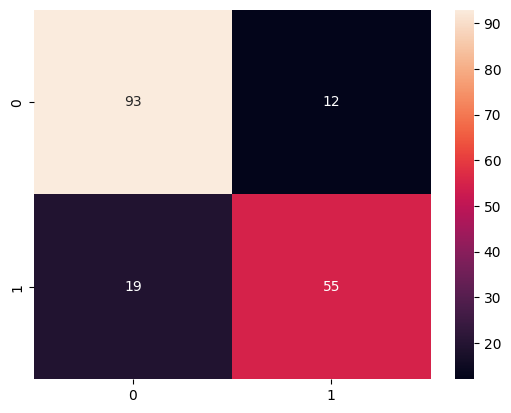

In [105]:
sns.heatmap(cm,annot=True)

In [106]:
precision_score(y_pred,ytest)

0.7432432432432432

In [107]:
recall_score(y_pred,ytest)

0.8208955223880597

In [108]:
f1_score(y_pred,ytest)

0.7801418439716312

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
DT=DecisionTreeClassifier()

In [111]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [112]:
y_pred=DT.predict(xtest)

In [113]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [114]:
accuracy_score(y_pred,ytest)

0.7932960893854749

In [115]:
recall_score(y_pred,ytest)

0.7466666666666667

In [116]:
import pickle

In [117]:
# save the model to a file
filename='model.pkl'
with open(filename,'wb') as file:
    pickle.dump(LR,file)

In [118]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
0,0.0,1.0,0.125,0.0,0.014151,0.271174,0.0,0.0,0.0
1,1.0,0.0,0.125,0.0,0.139136,0.472229,1.0,1.0,1.0
2,1.0,1.0,0.000,0.0,0.015469,0.321438,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.103644,0.434531,1.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.015713,0.434531,0.0,0.0,0.0


In [119]:

from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df_stsc = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df_stsc.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
0,-0.789272,0.827377,0.432793,-0.473674,-0.502445,-0.592481,-0.544925,-0.539992,-0.737695
1,1.266990,-1.566107,0.432793,-0.473674,0.786845,0.638789,1.835115,2.044533,1.355574
2,1.266990,0.827377,-0.474545,-0.473674,-0.488854,-0.284663,-0.544925,-0.539992,1.355574
3,1.266990,-1.566107,0.432793,-0.473674,0.420730,0.407926,1.835115,-0.539992,1.355574
4,-0.789272,0.827377,-0.474545,-0.473674,-0.486337,0.407926,-0.544925,-0.539992,-0.737695


In [120]:

from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled_data = scaler.fit_transform(df)
scaled_df_maxabs = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df_maxabs.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
0,0.0,1.000000,0.125,0.0,0.014151,0.2750,0.0,0.612404,0.25458
1,1.0,0.333333,0.125,0.0,0.139136,0.4750,1.0,1.000000,1.00000
2,1.0,1.000000,0.000,0.0,0.015469,0.3250,0.0,0.612404,1.00000
3,1.0,0.333333,0.125,0.0,0.103644,0.4375,1.0,0.612404,1.00000
4,0.0,1.000000,0.000,0.0,0.015713,0.4375,0.0,0.612404,0.25458


In [121]:

from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df_rs = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df_rs.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
0,0.0,0.0,1.0,0.0,-0.312011,-0.592240,0.0,0.000000,0.0
1,1.0,-2.0,1.0,0.0,2.461242,0.638529,1.0,4.240266,1.0
2,1.0,0.0,0.0,0.0,-0.282777,-0.284548,0.0,0.000000,1.0
3,1.0,-2.0,1.0,0.0,1.673732,0.407760,1.0,0.000000,1.0
4,0.0,0.0,0.0,0.0,-0.277363,0.407760,0.0,0.000000,0.0


In [122]:

from sklearn.preprocessing import Normalizer
 
scaler = Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df_mn = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df_mn.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin,Embarked,Sex
0,0.000000,0.128304,0.042768,0.0,0.310069,0.940899,0.000000,0.014499,0.008079
1,0.012375,0.012375,0.012375,0.0,0.882116,0.470242,0.012375,0.006850,0.009183
2,0.036528,0.109583,0.000000,0.0,0.289482,0.949721,0.000000,0.012383,0.027105
3,0.015715,0.015715,0.015715,0.0,0.834461,0.550021,0.015715,0.005327,0.011661
4,0.000000,0.083239,0.000000,0.0,0.223357,0.971116,0.000000,0.009406,0.005241


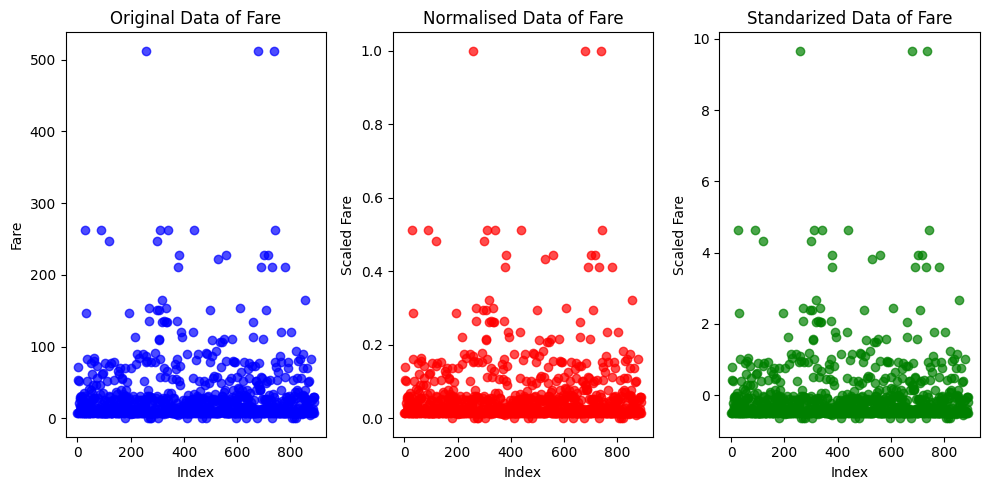

In [123]:

# Plot the scatter plot for original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(df.index, df['Fare'], color='blue', alpha=0.7)
plt.title('Original Data of Fare')
plt.xlabel('Index')
plt.ylabel('Fare')

# Plot the scatter plot for scaled data
plt.subplot(1, 3, 2)
plt.scatter(scaled_df.index, scaled_df['Fare'], color='red', alpha=0.7)
plt.title('Normalised Data of Fare')
plt.xlabel('Index')
plt.ylabel('Scaled Fare')

# Plot the scatter plot for scaled data
plt.subplot(1, 3, 3)
plt.scatter(scaled_df_stsc.index, scaled_df_stsc['Fare'], color='green', alpha=0.7)
plt.title('Standarized Data of Fare')
plt.xlabel('Index')
plt.ylabel('Scaled Fare')


plt.tight_layout()
plt.show()